Program ini menyajikan sebuah machine learning yang digunakan untuk prediksi harga Mobil bekas
Machine learning ini dibuat menggunakan algoritma K-Nearest Neighbors (KNN)

# 1. Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# 2. Load data harga mobil bekas merek Toyota di UK berdasarkan lokasi data

In [2]:
data_location='/content/toyota.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(6738, 9)

In [3]:
row_data.describe

<bound method NDFrame.describe of                model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize 

# 3. Bersihkan data yang tidak lengkap (kalau ada)

In [4]:
data = row_data.dropna(axis=0)
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Memeriksa tipe data mana saja yang bernilai integer dan float untuk diolah selanjutnya

In [5]:
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


# 4. Definisikan input output data yang menggunakan tipe data integer dan float

In [6]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((6738, 5), (6738,))

# 5. Membagi data untuk training dan validasi

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [8]:
test_y.shape

(1685,)

# 6. Membangun machine learning model dengan algoritma K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  34239918.03594575 
 Accuracy:  0.09914493863007989


# 7. Menggunakan Elbow method untuk menentukan nilak K terbaik

In [10]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

# 8. Menampilkan grafik nilai k berdasarkan MSE

Text(0.5, 1.0, 'Elbow Curve for Test')

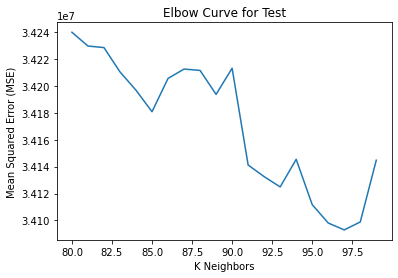

In [11]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

# 9. Melakukan koreksi nilai K dengan menggunakan nilai K terbaik berdasarkan hasil dari Elbow method.

Nilai K terbaik adalah nilai K yang menghasilkan MSE minimum, dalam kasus ini k=97

In [12]:
new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 10.301241818100404 
 Accuracy of old model (%): 9.914493863007989 
 Improvement (%): 0.38674795509241466


# 10. Contoh penggunaan machine learning yang dibuat untuk memprediksi harga mobil bekas

Memprediksi dengan memasukkan data yang dimiliki berupa:
1. Tahun dibuatnya mobil --- year
2. Jarak tempuh mobil dalam satuan mil --- mileage
3. Pajak kendaraan yang berlaku --- tax
4. Kebutuhan rata-rata bahan bakar dalam satuan mpg --- mpg
5. Besarnya ukuran mesin --- engineSize

Konversi mata uang : USD 1 = Rp 15.650 , data diambil pada 09 / 11 / 2022

**Percobaan ke 1**

Data mobil bekas: year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2

Format input data:

data_mobil_bekas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [14]:
data_mobil_bekas = np.array([[2019,5000,145,30.2,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: USD', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: USD', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga mobil dengan old model: USD [15614.325] atau jika dirupiahkan yaitu: Rp [298.38975075] Juta
 Hasil Prediksi harga mobil dengan new model: USD [14988.65979381] atau jika dirupiahkan yaitu: Rp [286.43328866] Juta


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Percobaan ke 2**

Data mobil bekas: year=2019, mileage=15000, tax=200, mpg=20.4, engineSize=3]

Format input data:

data_mobil_bekas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [19]:
data_mobil_bekas = np.array([[2019,15000,200,20.4,3]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil bekas dengan old model: USD', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil bekas dengan new model: USD', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga mobil bekas dengan old model: USD [12361.525] atau jika dirupiahkan yaitu: Rp [236.22874275] Juta
 Hasil Prediksi harga mobil bekas dengan new model: USD [12034.32989691] atau jika dirupiahkan yaitu: Rp [229.97604433] Juta


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Percobaan ke 3**

Data mobil bekas: year=2016, mileage=30000, tax=150, mpg=20, engineSize=2]

Format input data:

data_mobil_bekas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [20]:
data_mobil_bekas = np.array([[2016,30000,150,20,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil bekas dengan old model: USD', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil bekas dengan new model: USD', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga mobil bekas dengan old model: USD [11834.2625] atau jika dirupiahkan yaitu: Rp [226.15275637] Juta
 Hasil Prediksi harga mobil bekas dengan new model: USD [12151.88659794] atau jika dirupiahkan yaitu: Rp [232.22255289] Juta


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
